In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [29]:
#loading the dataset into dataframe using pandas
df = pd.read_csv('MH.csv')

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [5]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.shape

(54035, 9)

In [8]:
#Miss Valuse
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [9]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

True

In [10]:
#dropping duplicates
df = df.drop_duplicates()

In [11]:
data_dup = df.duplicated().any()
data_dup

False

In [24]:
len(df)

53732

# Split dataset and feature scaling

In [25]:
#split dataset
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.2)

In [26]:
# Feature Scaling
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

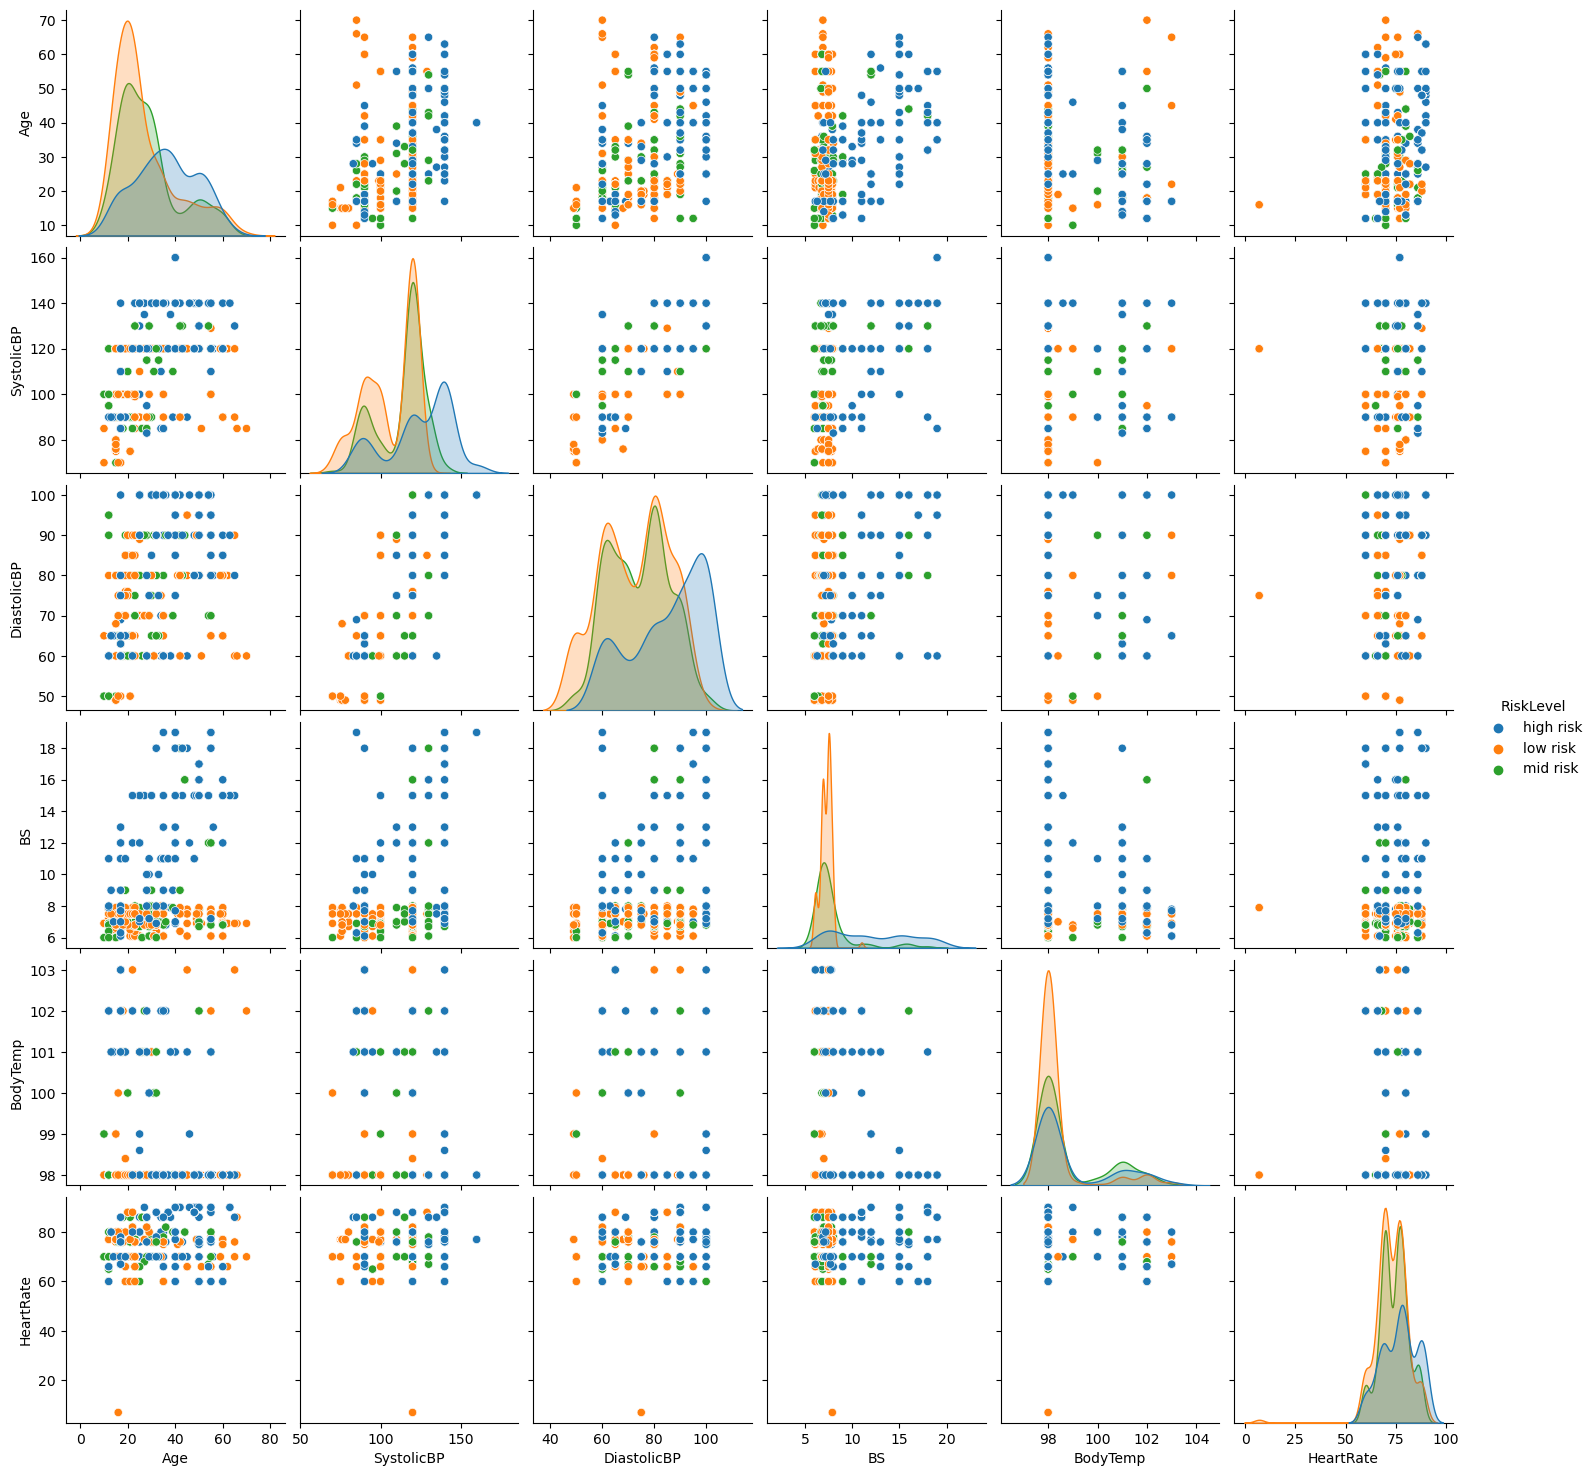

In [30]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=df, hue='RiskLevel')
plt.show()

# KNN Classifier

In [220]:
import math
math.sqrt(len(X_train))

19.0

In [221]:
#Define the model : Init K-NN
classifier = KNeighborsClassifier(n_neighbors = 11,p=3,metric = 'euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=3)

# Evaluating the model

In [222]:
#predict the test set results
Y_pred = classifier.predict(X_test)

In [223]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[13  4  2]
 [ 0 52  2]
 [ 4 11  3]]


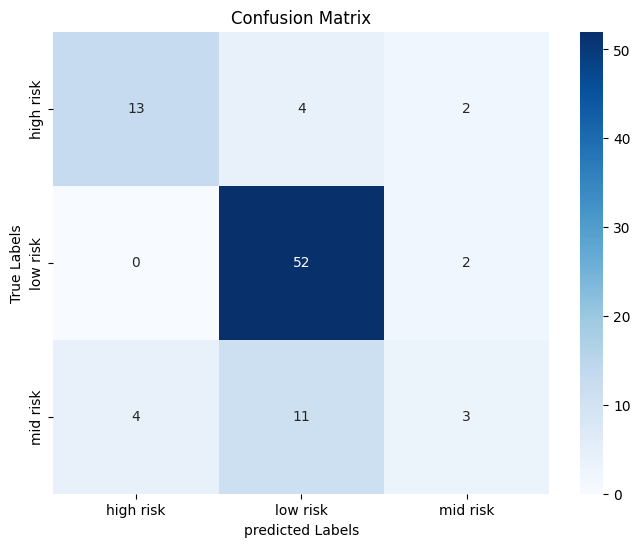

In [224]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [225]:
KNN_accuracy = classifier.score(X_test, Y_test)
print('Test Accuracy: ', KNN_accuracy)

Test Accuracy:  0.7472527472527473


In [226]:
#f1 score for K-NN
print(f1_score(Y_test, Y_pred, average='macro'))

0.607242118151209


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB, 
nb = GaussianNB()
nb.fit(X_train , Y_train)

SyntaxError: trailing comma not allowed without surrounding parentheses (1267119814.py, line 1)

# Evaluating the model

In [228]:
test_accuracy = nb.score(X_test, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.6923076923076923


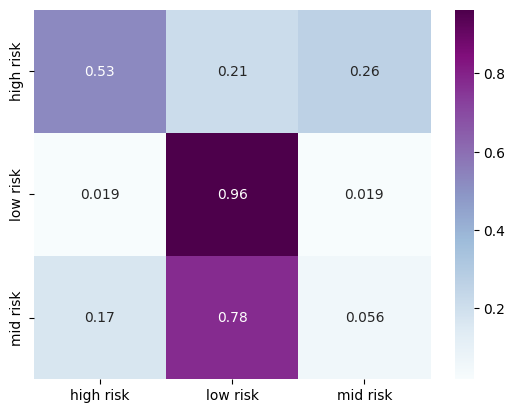

In [229]:
from sklearn.metrics import confusion_matrix

ypred = nb.predict(X_test)

labels = Y_test.unique()

cm_nb = confusion_matrix(Y_test, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_nb, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [230]:
print(f1_score(Y_test, ypred, average='macro'))

0.508256761159987


# Decision Tree:


In [231]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state=42, max_depth = 5, min_samples_leaf = 8)


# fit the grid search to the data
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=42)

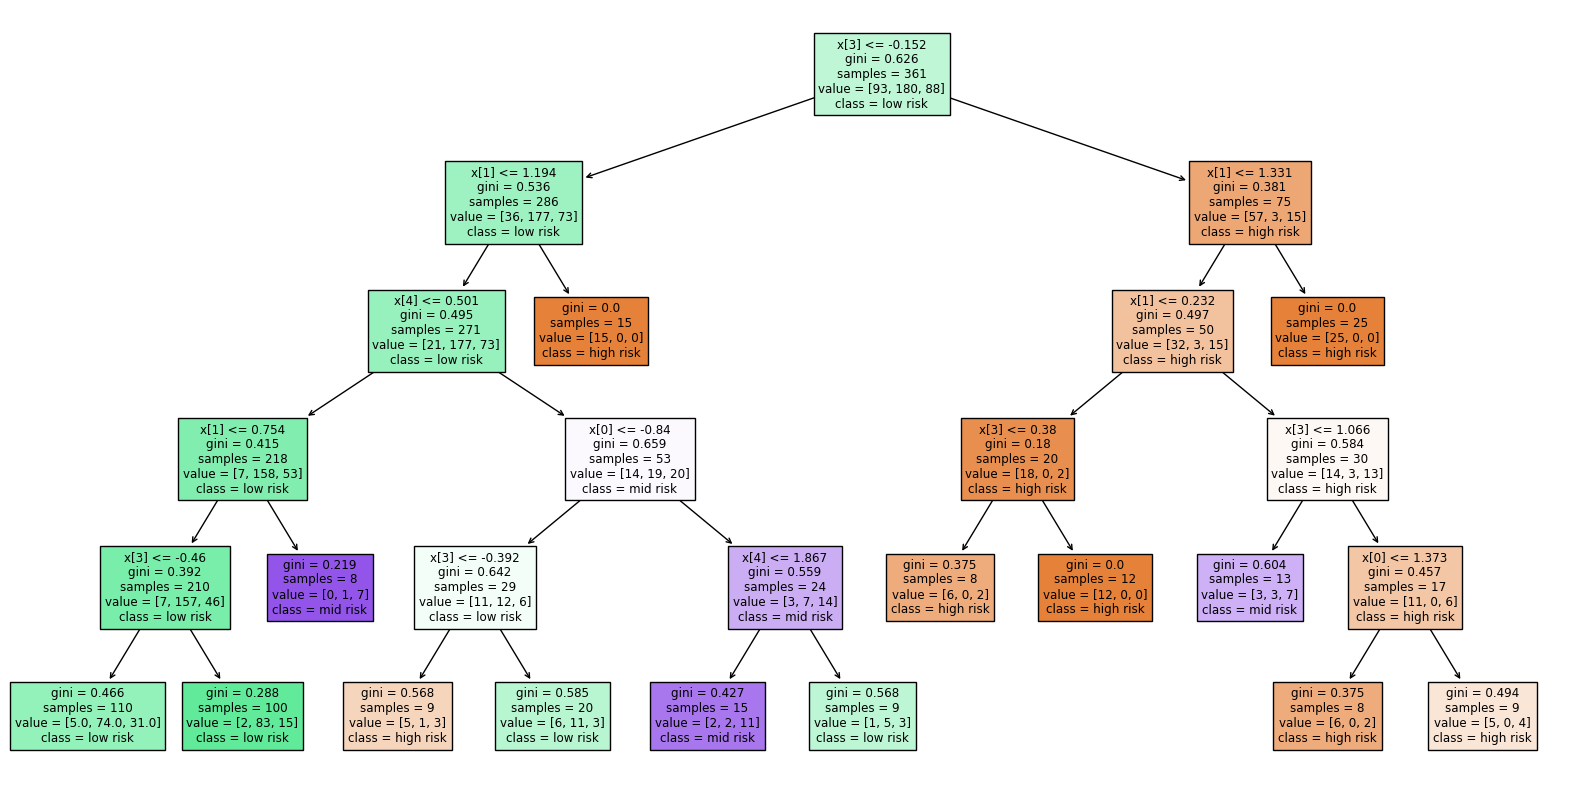

In [232]:
unique_classes = list(np.unique(Y_train))
plt.figure(figsize=(20,10))
plot_tree(tree, class_names=unique_classes, filled=True)
plt.show()

# Evaluating The Model

In [233]:
test_accuracy = tree.score(X_test, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7802197802197802


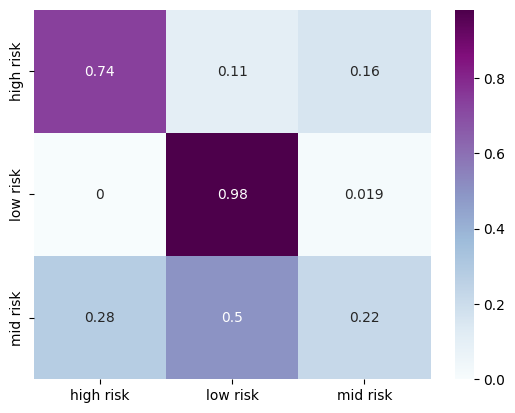

In [234]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

tpred = tree.predict(X_test)

labels = Y_test.unique()

cm_tree = confusion_matrix(Y_test, tpred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [235]:
print(f1_score(Y_test, tpred, average='macro'))

0.6476131659004094


In [236]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(Y_test, Y_pred)
print(tree_report)

              precision    recall  f1-score   support

   high risk       0.76      0.68      0.72        19
    low risk       0.78      0.96      0.86        54
    mid risk       0.43      0.17      0.24        18

    accuracy                           0.75        91
   macro avg       0.66      0.60      0.61        91
weighted avg       0.70      0.75      0.71        91



In [237]:
print('Training set score: {:.4f}'.format(tree.score(X_train, Y_train)))
print('Testing set score: {:.4f}'.format(tree.score(X_test, Y_test)))


Training set score: 0.7535
Testing set score: 0.7802


# Logistic Regression

In [238]:
from sklearn.preprocessing import MinMaxScaler

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

In [239]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=2000)

logreg.fit(Xtrain_scaled, Y_train)


LogisticRegression(max_iter=2000, random_state=122)

# Evaluating the model

In [240]:
# evaluate the best model on the test set
test_accuracy = logreg.score(Xtest_scaled, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7142857142857143


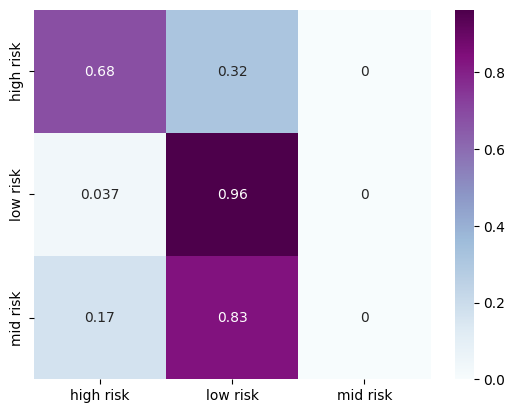

In [241]:
# visualize the confusion matrix using a heatmap
lpred = logreg.predict(Xtest_scaled)

labels = Y_test.unique()

cm_logistic = confusion_matrix(Y_test, lpred, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [242]:
print(f1_score(Y_test, lpred, average='macro'))

0.5072001134993261


In [243]:
# classification report
logistic_report = classification_report(Y_test, Y_pred)
print(logistic_report)



              precision    recall  f1-score   support

   high risk       0.76      0.68      0.72        19
    low risk       0.78      0.96      0.86        54
    mid risk       0.43      0.17      0.24        18

    accuracy                           0.75        91
   macro avg       0.66      0.60      0.61        91
weighted avg       0.70      0.75      0.71        91



# SVM : support vector machine

In [244]:

#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)



SVC(gamma=0.1, random_state=0)

# Evaluating the model

In [245]:
test_accuracy = svm.score(Xtest_scaled, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7362637362637363


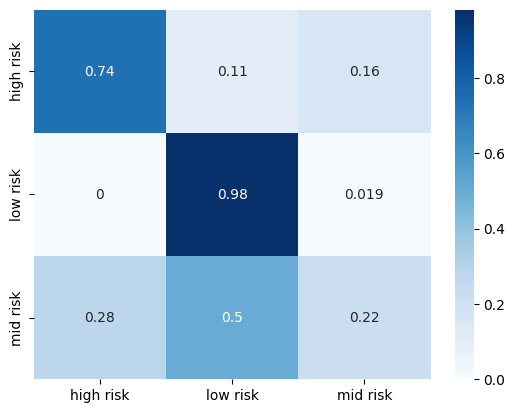

In [246]:
from sklearn.metrics import confusion_matrix

spred = tree.predict(X_test)

labels = Y_test.unique()

cm_tree = confusion_matrix(Y_test, spred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.show()

In [247]:
print(f1_score(Y_test, spred, average='macro'))

0.6476131659004094


# K means Clustering

[39692067036.47688, 13921062255.213428, 7022389316.467464, 4984017001.928836, 3779471724.48218, 3146028087.174179, 2777677986.2890205, 2460454236.4106517, 2192234362.482266]


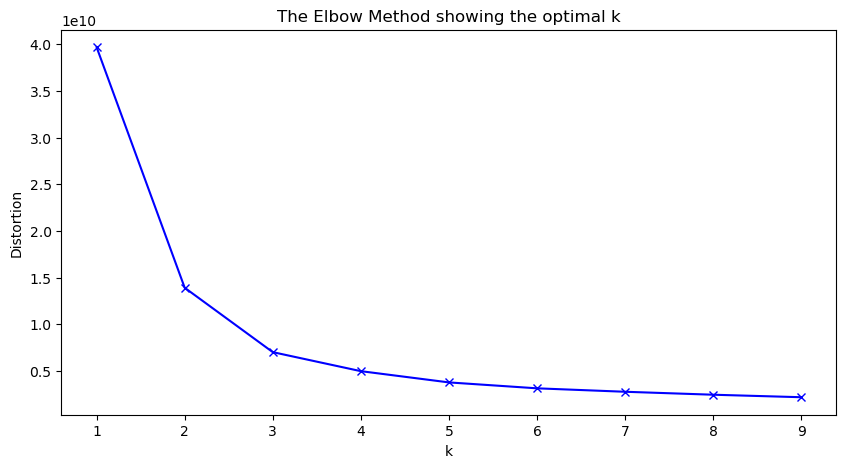

In [18]:
#Converting categorical data "RiskLevel" into numerical format
# df['RiskLevel'] = df['RiskLevel'].map({'low risk':0, 'mid risk':1, 'high risk':2})

# Split data into training and testing sets

X = df.iloc[:, 0:8].values



# Feature scaling using MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 2))
dataset_scaled_X_train = sc.fit_transform(X)



# Finding Best K By Elbow Method 

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init
    kmeanModel.fit(X)  
    distortions.append(kmeanModel.inertia_)
    
print(distortions)

# Plot the elbow
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0, n_init = 10)
KMeans_Clustering.fit(X)

#Cluster centres
print(KMeans_Clustering.cluster_centers_)

[[8.96055959e+02 4.48461719e+00 2.62552096e+00 7.80856942e+00
  8.72756482e-01 1.84437495e+03 9.07754624e+00 9.61177208e-01]
 [3.52667264e+02 3.69015042e+00 1.82450505e+00 7.03857677e+00
  6.72521543e-01 5.37669673e+02 8.04274639e+00 9.46480693e-01]]


# Evaluating model

In [20]:
id_clusters = KMeans_Clustering.fit_predict(X)
id_clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

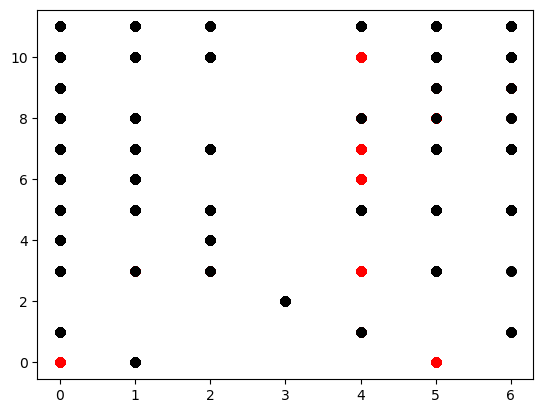

In [22]:
X = pd.DataFrame(X)
t1 = X[id_clusters == 0]
t2 = X[id_clusters == 1]
#t3 = X[id_clusters == 2]

plt.scatter(t1.iloc[:,2], t1.iloc[:,3], color = 'red')
plt.scatter(t2.iloc[:,2], t2.iloc[:,3], color = 'black')
#plt.scatter(t3.iloc[:,2], t3.iloc[:,3], color = 'blue')

# Comparison between all model

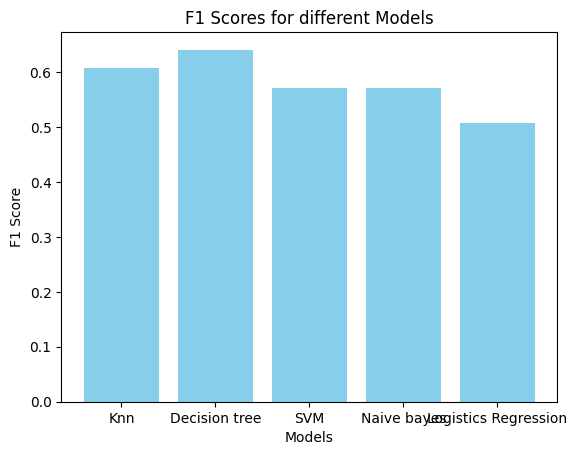

In [253]:
model_names = ['Knn','Decision tree','SVM','Naive bayes','Logistics Regression']
f1_scores = [0.607242118151209, 0.640675763482781,0.5717382525277924,0.5717382525277924,0.5072001134993261]
x=np.arange(len(model_names))
plt.bar(x,f1_scores,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for different Models')
plt.xticks(x,model_names)
plt.show()

# Accuracy comparision for different models

In [254]:
#accuracy
print(accuracy_score(Y_test,Y_pred))

0.7472527472527473


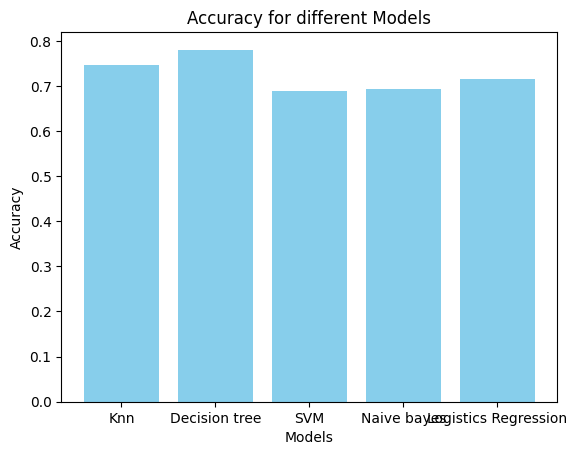

In [255]:
model_names = ['Knn','Decision tree','SVM','Naive bayes','Logistics Regression']
accuracy = [0.7472527472527473,0.7802197802197802,0.6885245901639344,0.6923076923076923,0.7142857142857143]
x=np.arange(len(model_names))
plt.bar(x,accuracy,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

In [256]:
print(classification_report(Y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

   high risk       0.76      0.68      0.72        19
    low risk       0.78      0.96      0.86        54
    mid risk       0.43      0.17      0.24        18

    accuracy                           0.75        91
   macro avg       0.66      0.60      0.61        91
weighted avg       0.70      0.75      0.71        91



# Classificaiton Report

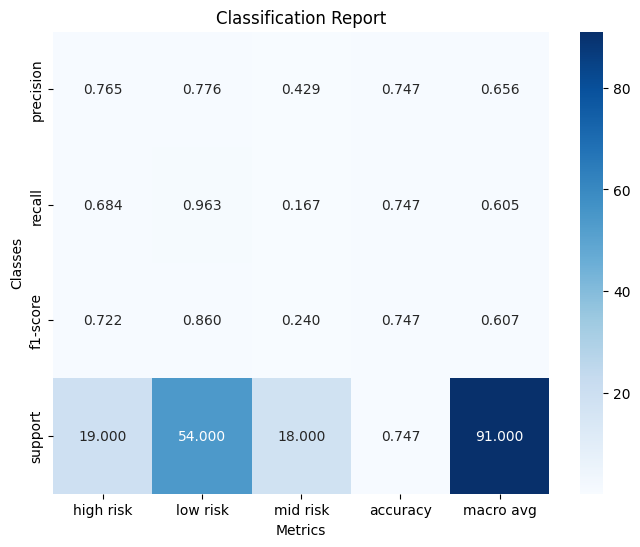

In [257]:
report = classification_report(Y_test, classifier.predict(X_test), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()